# Base séquentielle des parcours de soins patients

Objectif: déterminer les flux de patients

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%%capture capt
p_soins=pd.read_csv("./data/parcours_soins.csv")

In [3]:
p_soins

,BEN_NIR_IDT,2008-01-15,2008-02-15,2008-03-15,2008-04-15,2008-05-15,2008-06-15,2008-07-15,2008-08-15,2008-09-15,...,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29
0,P0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,P24302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10047,P24303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10048,P24304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10049,P24308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Création de la base séquentielle d'hospitalisations

### Pour l'ensemble de la population

In [4]:
p_soins_list=[]
for patient in tqdm(range(len(p_soins))):
    p_soins_list.append(p_soins.iloc[patient].dropna().tolist()[1:-1])

100%|██████████| 10051/10051 [00:05<00:00, 1901.23it/s]


In [5]:
p_soins_df=pd.DataFrame(p_soins_list)
p_soins_df.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,05K051,05M042,05M16T,05M09T,05M092,05C191,05M20Z,05M20Z,None,None,...,None,None,None,None,None,None,None,None,None,None
1,02C05J,02C05J,05M093,04M132,05C222,23M103,04M053,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,11M041,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,05M04T,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,08C11V,23M15Z,05K102,05M08T,05K102,05C191,23M101,05K191,None,None,...,None,None,None,None,None,None,None,None,None,None


Text(0, 0.5, 'Probabilité')

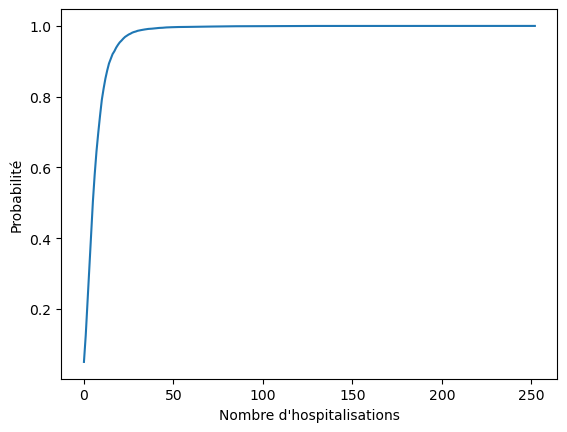

In [6]:
#CdF du nombre d'hospitalisations
(1-p_soins_df.describe().iloc[0]/len(p_soins_list)).plot()
#plt.axhline(y = 0.5, color='r', linestyle='-', label="0.5")
#plt.axhline(y = 0.05, color='r', linestyle='--', label="0.05")
#plt.axhline(y = 0.95, color='r', linestyle='-.', label="0.95")
plt.xlabel("Nombre d'hospitalisations")
plt.ylabel("Probabilité")
#plt.legend()

### Pour les patients avec une hospitalisation pour un GHM '05M091', en considérant cette hospitalisation comme début de parcours 

In [7]:
p_soins_IC=[]
for patient in tqdm(range(len(p_soins))):
    parcours=p_soins.iloc[patient].dropna()
    if parcours.eq('05M091').any():
        start=0
        while parcours.tolist()[start]!='05M091':
            start+=1
        p_soins_IC.append(parcours.tolist()[start:-1])

100%|██████████| 10051/10051 [00:08<00:00, 1219.23it/s]


In [8]:
p_soins_IC_df=pd.DataFrame(p_soins_IC)
p_soins_IC_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,05M091,05M171,05M13T,05M13T,05M13T,05K061,05M13T,05M13T,05M13T,05K241,...,None,None,None,None,None,None,None,None,None,None
1,05M091,23K02Z,09C081,09C082,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,05M091,05K111,05M15T,19M062,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,05M091,05M092,05M092,05M093,05M092,05M093,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,05M091,05M09T,05M093,05M093,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
p_soins_IC_df[1].describe()

count        786
unique       259
top       05M092
freq          66
Name: 1, dtype: object

Text(0, 0.5, 'Probabilité')

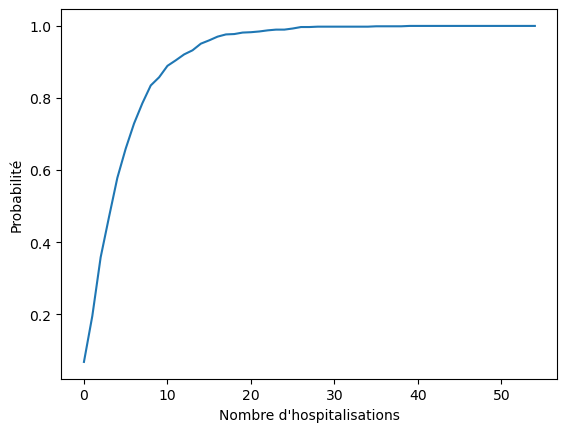

In [10]:
#CdF du nombre d'hospitalisations
(1-p_soins_IC_df.describe().iloc[0]/len(p_soins_IC)).plot()
#plt.axhline(y = 0.5, color='r', linestyle='-', label="0.5")
#plt.axhline(y = 0.05, color='r', linestyle='--', label="0.05")
#plt.axhline(y = 0.95, color='r', linestyle='-.', label="0.95")
plt.xlabel("Nombre d'hospitalisations")
plt.ylabel("Probabilité")
#plt.legend()

## Flux de patients

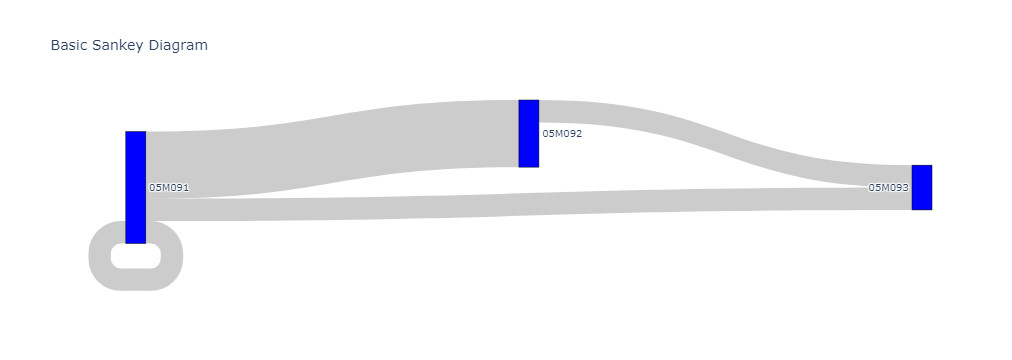

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["05M091", "05M092", "05M093"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0,0], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1, 2, 2,0],
      value = [6, 2, 2,2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()